In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.impute import SimpleImputer

In [2]:
# Load the dataset
df = pd.read_csv("uber.csv")

# view dataset
df.head(3)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1


In [3]:
df.shape

(200000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [5]:
df.sample(5)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
22695,26926467,2009-05-04 19:17:53.0000005,4.9,2009-05-04 19:17:53 UTC,-73.967279,40.788138,-73.979455,40.784712,1
127608,5838404,2009-09-16 18:12:38.0000004,16.5,2009-09-16 18:12:38 UTC,-73.957783,40.767585,-74.007981,40.740482,1
30790,46484777,2009-07-08 01:14:00.00000022,27.7,2009-07-08 01:14:00 UTC,-73.874335,40.774143,-74.005853,40.706423,1
134665,9252651,2009-08-20 00:40:00.00000049,6.1,2009-08-20 00:40:00 UTC,-73.991862,40.726078,-74.000820,40.733877,1
111716,23748034,2011-02-02 17:19:00.00000075,20.1,2011-02-02 17:19:00 UTC,-74.011522,40.701752,-73.954298,40.773700,1


In [6]:
df.drop(columns=["Unnamed: 0", 'pickup_datetime'], inplace=True)

In [7]:
df.isnull().sum()*100 /len(df)

key                  0.0000
fare_amount          0.0000
pickup_longitude     0.0000
pickup_latitude      0.0000
dropoff_longitude    0.0005
dropoff_latitude     0.0005
passenger_count      0.0000
dtype: float64

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
df.isnull().sum()

key                  0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [10]:
df.shape

(199999, 7)

In [11]:
df["key"] = pd.to_datetime(df["key"])
df[ "weekday"] = df["key"].dt.weekday

In [12]:
lat_to_km = 111
long_to_km = 85

In [13]:
df['manhattan_distance_km'] = (df['pickup_latitude'] - df['dropoff_latitude']).abs() * lat_to_km +  (df['pickup_longitude'] - df['dropoff_longitude']).abs() * long_to_km

In [15]:
df.sample(4)

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,manhattan_distance_km
119331,2010-10-10 00:42:57.000000400,14.1,-73.965912,40.768634,-73.997906,40.727875,1,6,7.243739
38634,2011-08-07 16:15:08.000000300,10.5,-73.984150,40.745949,-74.009319,40.715349,2,6,5.535965
139706,2012-09-14 14:29:56.000000100,12.5,-73.973346,40.763738,-74.005057,40.751689,1,4,4.032874
111222,2012-02-03 14:59:00.000000430,12.1,-73.995107,40.725415,-73.983562,40.761910,1,4,5.032270


In [17]:
df.describe()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,manhattan_distance_km
count,199999,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,2012-03-22 14:58:56.889214720,11.359892,-72.527631,39.935881,-72.525292,39.923890,1.684543,3.048435,31.054609
min,2009-01-01 01:15:22.000000600,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,0.000000,0.000000
25%,2010-08-25 08:19:54,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000,1.000000,1.554543
50%,2012-03-21 20:44:25,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000,3.000000,2.728282
75%,2013-10-19 02:21:09.000000512,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000,5.000000,5.004448
max,2015-06-30 23:40:39.000000100,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,6.000000,334487.284561
std,NaN,9.901760,11.437815,7.720558,13.117408,6.794829,1.385995,1.946946,1118.641750


In [23]:
nyc_latitude_range = (40.5, 41.0)
nyc_longitude_range = (-74.5, -73.5)

In [27]:
uber_new_set = df[
    (df['pickup_latitude'].between(nyc_latitude_range[0], nyc_latitude_range[1])) &
    (df['pickup_longitude'].between(nyc_longitude_range[0], nyc_longitude_range[1])) &
    (df['dropoff_latitude'].between(nyc_latitude_range[0], nyc_latitude_range[1])) &
    (df['dropoff_longitude'].between(nyc_longitude_range[0], nyc_longitude_range[1]))
]


In [28]:
uber_new_set.shape

(195660, 9)

In [30]:
uber_new_set.describe()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,manhattan_distance_km
count,195660,195660.000000,195660.000000,195660.000000,195660.000000,195660.000000,195660.000000,195660.000000,195660.000000
mean,2012-03-21 21:32:08.454927104,11.327179,-73.975454,40.750785,-73.974498,40.751080,1.685015,3.048262,4.284325
min,2009-01-01 01:15:22.000000600,-52.000000,-74.403080,40.508697,-74.449079,40.510800,0.000000,0.000000,0.000000
25%,2010-08-21 17:28:25.500000512,6.000000,-73.992277,40.736457,-73.991600,40.735329,1.000000,1.000000,1.607409
50%,2012-03-21 10:50:30.000000256,8.500000,-73.982115,40.753300,-73.980547,40.753734,1.000000,3.000000,2.775261
75%,2013-10-19 21:01:07.250000384,12.500000,-73.968388,40.767520,-73.965427,40.768314,2.000000,5.000000,5.048026
max,2015-06-30 23:40:39.000000100,499.000000,-73.506178,40.991651,-73.515512,40.996788,208.000000,6.000000,77.984046
std,NaN,9.699879,0.034956,0.027053,0.034932,0.030866,1.388011,1.947183,4.755369


In [31]:
def detect_outliers_iqr(df, column_name, logical_conditions):
    filtered_df = df. query(logical_conditions)
    Q1 = filtered_df[column_name]. quantile(0.25)
    Q3 = filtered_df[column_name]. quantile (0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = filtered_df[(filtered_df[column_name] < lower_bound) | (filtered_df[column_name] > upper_bound)]

    return lower_bound, upper_bound, outliers

In [34]:
def uber_boxplot(df):
    plt. figure (figsize=(18, 5))

    plt. subplot (1, 3, 1)
    sns. boxplot (data=df, y="fare_amount")
    plt.title('Fare Amount Boxplot')
    plt.ylabel( 'Fare Amount')

    plt. subplot(1, 3, 2)
    sns.boxplot(data=df, y='manhattan_distance_km')
    plt.title( 'Manhattan Distance Boxplot')
    plt.ylabel( 'Manhattan Distance (km)')

    plt. tight_layout()
    plt. show()


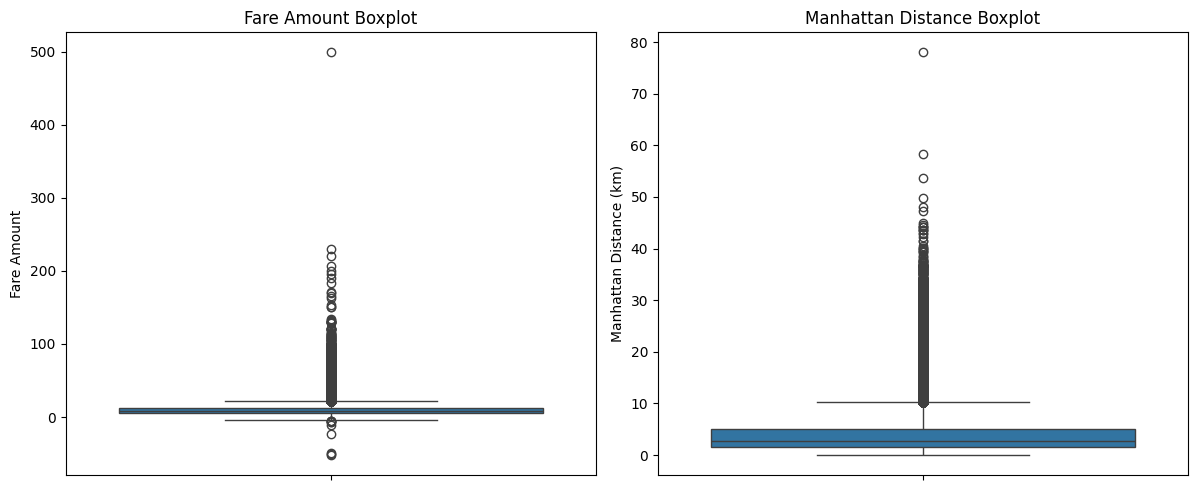

In [35]:
uber_boxplot(uber_new_set)

In [36]:
# Detect outliers for fare_amount
fare_lower, fare_upper, fare_outliers = detect_outliers_iqr( uber_new_set, 'fare_amount', 'fare_amount>0')
                                                            
print(f"Fare Amount Bounds: ({fare_lower}, {fare_upper}), Outliers Detected: {fare_outliers.shape[0]}")

Fare Amount Bounds: (-3.75, 22.25), Outliers Detected: 16709


In [37]:
# Detect outliers for manhattan_distance_km
distance_lower, distance_upper, distance_outliers = detect_outliers_iqr(uber_new_set, 'manhattan_distance_km', 'manhattan_distance_km > 1')
print(f"Manhattan Distance Bounds: ({distance_lower}, {distance_upper}), Outliers Detected: {distance_outliers.shape[0]}")


Manhattan Distance Bounds: (-3.40938650000151, 10.794937500000408), Outliers Detected: 13521


In [39]:
# Detect outliers for passenger_count
passenger_lower, passenger_upper, passenger_outliers = detect_outliers_iqr(uber_new_set, 'passenger_count', '(passenger_count > 0) & (passenger_count <= 6)')
print(f"Passenger Count Bounds: ({passenger_lower}, {passenger_upper}), Outliers Detected: {passenger_outliers.shape[0]}")

Passenger Count Bounds: (-0.5, 3.5), Outliers Detected: 22079


In [40]:
uber_cleaned = uber_new_set[((uber_new_set['fare_amount'] > 0) & (uber_new_set['fare_amount'] < fare_upper)) & ((uber_new_set[ 'manhattan_distance_km'] < distance_upper) & (uber_new_set['manhattan_distance_km'] > 1)) & ((uber_new_set['passenger_count'] > 0) & (uber_new_set['passenger_count'] < passenger_upper))]
uber_cleaned.shape

(139260, 9)

In [42]:
uber_cleaned.describe()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,weekday,manhattan_distance_km
count,139260,139260.000000,139260.000000,139260.000000,139260.000000,139260.000000,139260.000000,139260.000000,139260.000000
mean,2012-03-12 10:35:49.690076672,9.264216,-73.980550,40.752061,-73.978821,40.752103,1.267801,3.044219,3.429110
min,2009-01-01 01:15:22.000000600,0.010000,-74.271207,40.581779,-74.299372,40.579462,1.000000,0.000000,1.000018
25%,2010-08-10 03:50:09.750000640,6.100000,-73.992665,40.737207,-73.991918,40.736905,1.000000,1.000000,1.818651
50%,2012-03-09 08:03:50,8.500000,-73.982621,40.753001,-73.981324,40.753681,1.000000,3.000000,2.797221
75%,2013-10-08 19:07:18.500000256,11.500000,-73.970701,40.766765,-73.968513,40.767593,1.000000,5.000000,4.451294
max,2015-06-30 23:33:33.000000200,22.200000,-73.506178,40.966745,-73.515512,40.996788,3.000000,6.000000,10.794304
std,NaN,3.925635,0.020406,0.023318,0.021820,0.025723,0.545706,1.942646,2.101865


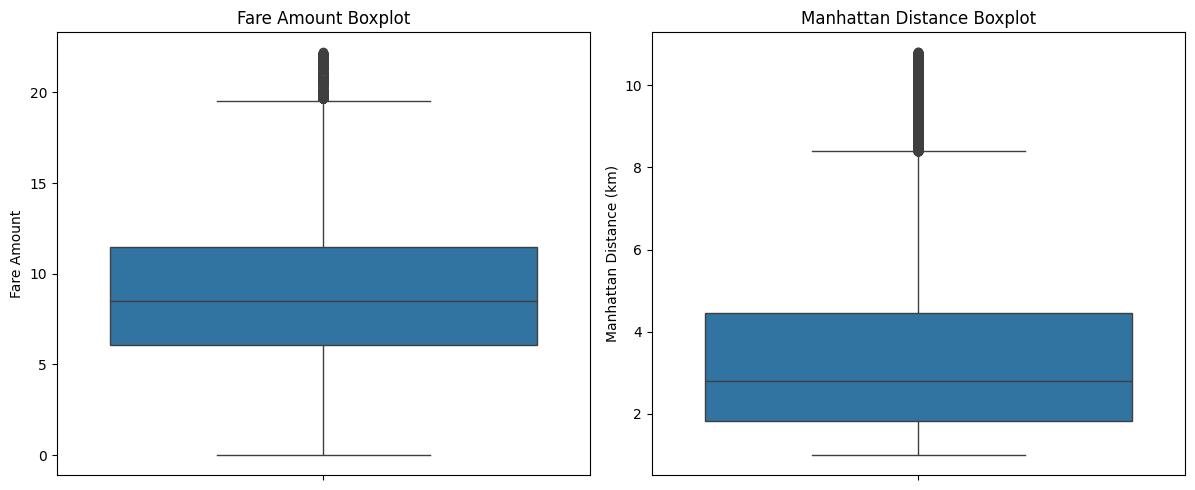

In [43]:
uber_boxplot(uber_cleaned)

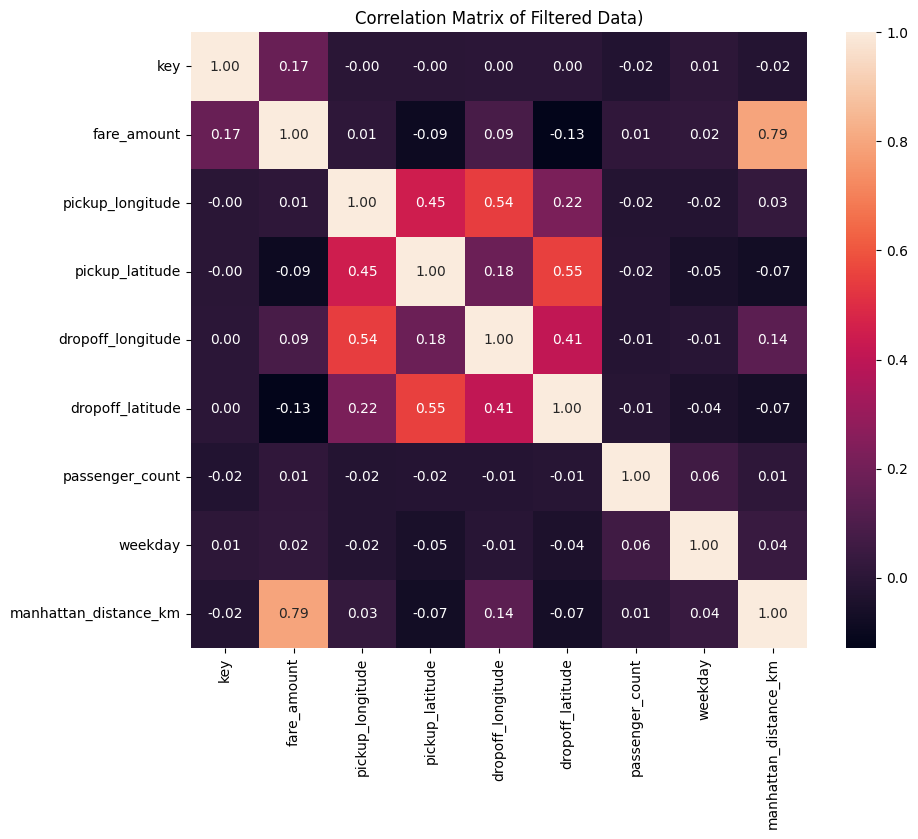

In [47]:
# Calculate the correlation matrix for the filtered DataFrame
correlation_matrix_filtered = uber_cleaned.corr()

# Visualize the correlation matrix using a heatmap
plt.figure (figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, fmt=".2f", square=True)
plt.title('Correlation Matrix of Filtered Data)')
plt.show()

In [48]:
#modelling
X= uber_cleaned[['manhattan_distance_km' ]]
y = uber_cleaned[ 'fare_amount' ]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions
y_pred_linear = linear_model.predict(X_test)
# Evaluate the model
linear_rmse = mean_squared_error(y_test, y_pred_linear, squared=False)
linear_r2 = r2_score (y_test, y_pred_linear)
print(f"Linear Regression RMSE: {linear_rmse:.2f}, R^2: {linear_r2:.2f}")

Linear Regression RMSE: 2.39, R^2: 0.63


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [50]:
# Create a Ridge Regression model with a regularization parameter (alpha)

ridge_model = Ridge(alpha=1.0)
ridge_model. fit(X_train, y_train)

# Make predictions

y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model

ridge_rmse = mean_squared_error (y_test, y_pred_ridge, squared=False)

ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression RMSE: {ridge_rmse:.2f}, R^2: {ridge_r2: 2f}")


Ridge Regression RMSE: 2.39, R^2:  0.625717


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [51]:
# Create a Lasso Regression model with a regularization parameter (alpha)
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the model
lasso_rmse = mean_squared_error(y_test, y_pred_lasso, squared=False)
lasso_r2 = r2_score(y_test, y_pred_lasso)
print(f"Lasso Regression RMSE: {lasso_rmse:.2f}, R^2: {lasso_r2:.2f}")

Lasso Regression RMSE: 2.39, R^2: 0.63


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [52]:
# Summary of the results
results = pd. DataFrame ({
'Model': ['Linear Regression', 'Ridge Regression'
, 'Lasso Regression'],
'RMSE': [linear_rmse, ridge_rmse, lasso_rmse],
'R^2': [linear_r2, ridge_r2, lasso_r2]
})
print (results)

               Model      RMSE       R^2
0  Linear Regression  2.390065  0.625717
1   Ridge Regression  2.390065  0.625717
2   Lasso Regression  2.390176  0.625682
